In [1]:
import phoebe
import numpy as np
import matplotlib.pyplot as plt

In [2]:
b = phoebe.default_binary()

b.add_dataset('lc', passband='Johnson:B', dataset='mylcB')
b.add_dataset('lc', passband='Johnson:V', dataset='mylcV')
b.add_dataset('rv', passband='Johnson:V', dataset='myrv')

b.add_compute(kind='phoebe', compute='mymodel')

<ParameterSet: 43 parameters | datasets: myrv, _default, mylcB, mylcV>

In [3]:
b.flip_constraint('mass@primary', solve_for='sma@binary')
b.flip_constraint('mass@secondary', solve_for = 'q@binary')

<ConstraintParameter: {q@binary@component} = {mass@secondary@component} / {mass@primary@component} (solar units) => 1.0>

In [4]:
period = 8.345678901
incl = 88.56

In [5]:
b['requiv@primary'] = 1.473
b['requiv@secondary'] = 0.937
b['mass@primary'] = 1.473**(1/0.57)
b['mass@secondary'] = 0.932**(1/0.8)
b['incl@binary'] = incl
b['period@binary'] = period
b['teff@primary'] = 6342.
b['teff@secondary'] = 5684.
b['t0@system'] = 1.23456789
b['ecc@orbit'] = 0.148
b['per0@orbit'] = 65.5
b['vgamma@system'] = 185.5

In [14]:
# from phoebe.dependencies import crimpl
# s = crimpl.RemoteSlurmServer(host='clusty')
# s.run_script(['pip install https://github.com/phoebe-project/phoebe2/archive/refs/heads/workshop2021.zip --ignore-installed'], 
#              conda_env='phoebe-workshop')
# s.save('clusty', overwrite=True)

In [6]:
b.add_server('remoteslurm', crimpl_name='clusty', nprocs=48, walltime=48,
             use_conda=True, conda_env='phoebe-workshop',
             server='clusty')

<ParameterSet: 11 parameters | qualifiers: crimpl_name, use_conda, mail_type, mail_user, install_deps, walltime, nprocs, isolate_env, slurm_job_name, conda_env, use_mpi>

In [7]:
t = np.linspace(1., 4.41*period, 458)
t_rv = 100. + np.random.rand(14) * 50

b['times@mylcB@dataset'] = t
b['times@mylcV@dataset'] = t
b['times@rv@primary@dataset'] = t_rv
b['times@rv@secondary@dataset'] = t_rv
b.run_compute('mymodel', use_server='clusty')

# crimpl: ssh clusty "mkdir -p ~/crimpl"
# crimpl: scp exportpath.sh clusty:~/crimpl/
# crimpl: ssh clusty "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh clusty "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh clusty "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh clusty "source ~/crimpl/exportpath.sh; mkdir -p ~/crimpl"
# crimpl: scp crimpl_run_script.sh clusty:~/crimpl/
# crimpl: ssh clusty "source ~/crimpl/exportpath.sh; cd ~/crimpl; chmod +x ./crimpl_run_script.sh; ./crimpl_run_script.sh"
# crimpl: ssh clusty "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh clusty "pwd"
# crimpl: ssh clusty "ls /home/users/angela/crimpl/crimpl-job-2021.06.08-21.32.42/*"
# crimpl: ssh clusty "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh clusty "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh clusty "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh clusty "ls -d ~/crimpl/crimpl-job-2021.06.08-21.32.42/crimpl-envs/*"
# crimpl: ssh clusty "source ~/crimpl/exportpat

<ParameterSet: 9 parameters | kinds: lc, rv>

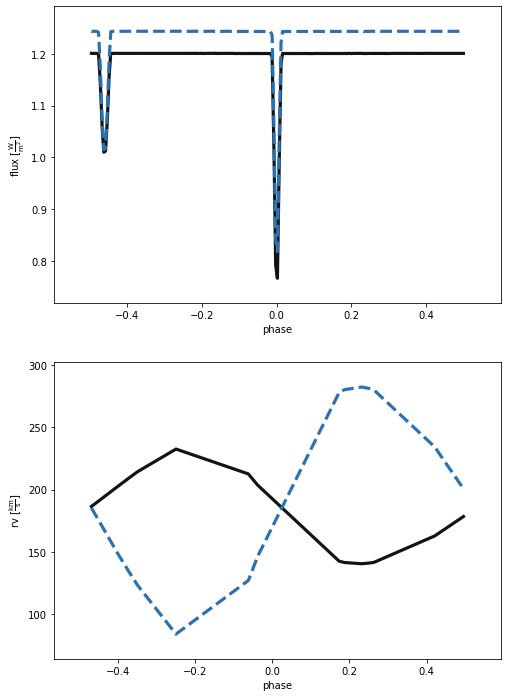

(<autofig.figure.Figure | 2 axes | 4 call(s)>,
 <Figure size 576x864 with 2 Axes>)

In [8]:
%matplotlib inline
b.plot(x='phases', show=True)

In [10]:
noise = 0.003 * np.exp( 0.4 + (t-t[0])/(t[-1]-t[0]) ) + np.random.normal(0.0, 0.003, len(t)) - 0.002*(t-t[0])**2/(t[-1]-t[0])**2 + 0.001*(t-t[0])/(t[-1]-t[0]) + 0.0002
noise -= np.mean(noise)

noise_rv1 = np.random.normal(0, 2.5, len(t_rv))
noise_rv2 = np.random.normal(0, 3.5, len(t_rv))

In [9]:
# b.run_compute('mymodel', use_server='clusty', distortion_method='sphere', irrad_method='horvat', model='sphere_irrad')
# b.run_compute('mymodel', use_server='clusty', distortion_method='roche', irrad_method='horvat', model='roche_irrad')
# b.run_compute('mymodel', use_server='clusty', distortion_method='sphere', irrad_method='none', model='sphere_noirrad')
# b.run_compute('mymodel', use_server='clusty', distortion_method='roche', irrad_method='none', model='roche_noirrad')

In [11]:
# fluxes = b.get_value('fluxes', context='model', model='latest')
# phases = b.to_phase(b.get_value('times', context='model', model='latest', dataset='mylc'))
# fluxes_sphere_irrad = b.get_value('fluxes', context='model', model='sphere_irrad')
# fluxes_sphere_noirrad = b.get_value('fluxes', context='model', model='sphere_noirrad')
# fluxes_roche_irrad = b.get_value('fluxes', context='model', model='roche_irrad')
# fluxes_roche_noirrad = b.get_value('fluxes', context='model', model='roche_noirrad')

In [12]:
# s=np.argsort(phases)

In [13]:
# plt.plot(noise, 'k.', label='noise')
# plt.plot(fluxes_roche_irrad-fluxes_sphere_irrad, '-', label='')
# plt.plot(fluxes_roche_irrad-fluxes_sphere_noirrad, '-')

In [14]:
# %matplotlib qt
# plt.plot(phases[s], fluxes[s]+noise[s], 'k.')
# plt.plot(phases[s], fluxes_roche_irrad[s], '-')
# plt.plot(phases[s], fluxes_sphere_noirrad[s], '-')

(<autofig.figure.Figure | 2 axes | 4 call(s)>,
 <Figure size 576x864 with 2 Axes>)

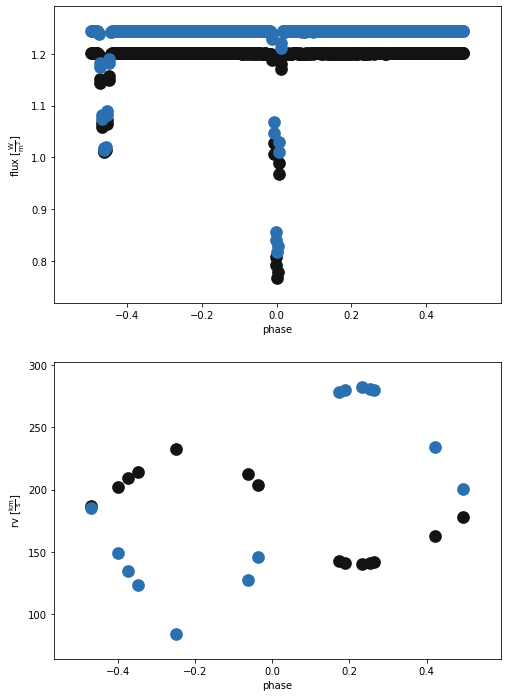

In [15]:
with open('lc.B.data', 'w') as f:
    for i in range(len(t)):
        f.write('%f  %f  %f\n' % (b['value@times@mylcB@mymodel'][i], b['value@fluxes@mylcB@mymodel'][i] + noise[i], 0.0003))

with open('lc.V.data', 'w') as f:
    for i in range(len(t)):
        f.write('%f  %f  %f\n' % (b['value@times@mylcV@mymodel'][i], b['value@fluxes@mylcV@mymodel'][i] + noise[i], 0.0003))


with open('rv1.data', 'w') as f:
    for i in range(len(t_rv)):
        f.write('%f  %f  %f\n' % (b['value@times@primary@myrv@mymodel'][i], b['value@rvs@primary@myrv@mymodel'][i] + noise_rv1[i], 2.5))

with open('rv2.data', 'w') as f:
    for i in range(len(t_rv)):
        f.write('%f  %f  %f\n' % (b['value@times@secondary@myrv@mymodel'][i], b['value@rvs@secondary@myrv@mymodel'][i] + noise_rv2[i], 3.5))

b.plot(x='phase', marker='o', linestyle='None', save='exercises_data.png')